# Phase diagram with general parameters
For $(\rho_S, p_S)$ equations, ignoring the translational difussion, the dynamics of fluctuations with respect to the
homogenous phase is governed by
$$\partial_t \delta f = q J \delta f,$$
where the matrix $J$ reads
$$ J=
\begin{pmatrix}
        0 & 0 & -i \bar{v}_A & 0 \\
        0 & 0 & 0 & -i \bar{v}_B \\
        -i\nu_{AA}/\bar{v}_A & -i\nu_{AB}/\bar{v}_A & -\gamma_A &0 \\
        -i\nu_{BA}/\bar{v}_B & -i\nu_{BB}/\bar{v}_B & 0 & -\gamma_B
    \end{pmatrix},
$$
and
$$
    \begin{align*}
    \nu_{SS'}(q)&\equiv\frac{\bar{v}_S^2}{2}(\delta_{S,S'}+\omega_{SS'}(1-q^2\ell^2)),\\
    \gamma_S(q)&\equiv\frac{D_{r,S}}{q}+\frac{\bar{v}_S^2 q}{16D_{r,S}}.
    \end{align*}
$$
Denoting the eigenvalues of $J$ as $\lambda$, which are roots of $|J-\lambda I|=0$,
with
$$
|J-\lambda I| = a_0\lambda^4 + a_1\lambda^3 + a_2\lambda^2 + a_3\lambda + a_4,
$$
where
$$
    \begin{aligned}
    a_0 &= 1, \\
    a_1 &= \gamma_A + \gamma_B,\\
    a_2 &= \gamma_A \gamma_B + \nu_{AA} + \nu_{BB},\\
    a_3 &= \gamma_A \nu_{BB} + \gamma_B \nu_{AA},\\
    a_4 &= \nu_{AA}\nu_{BB} - \nu_{AB}\nu_{BA}.
    \end{aligned}
$$

The necessary condition for $\Re(\lambda(q))<0$ is $a_i>0$, while the necessary and sufficient condition is $\Delta_i > 0$ for $i=1, 2, 3, 4$, where
$$
    \begin{aligned}
    \Delta_1 &= a_1,\\
    \Delta_2 &= \left|\begin{matrix}
        a_1 & a_0 \\
        a_3 & a_2
    \end{matrix}\right| = a_1 a_2 - a_0 a_3, \\
    \Delta_3 &= \left|\begin{matrix}
        a_1 & a_0 & 0\\
        a_3 & a_2 & a_1 \\
        0 & a_4 & a_3
    \end{matrix}\right| = a_3\Delta_2 - a_1^2 a_4 = a_1 a_2 a_3 -a_1^2 a_4 - a_0 a_3^2, \\
    \Delta_4 &= \left|\begin{matrix}
        a_1 & a_0 & 0 & 0\\
        a_3 & a_2 & a_1 & a_0\\
        0 & a_4 & a_3 & a_2 \\
        0 & 0 & 0 & a_4
    \end{matrix}\right| = a_4 \Delta_3.
    \end{aligned}
$$
Therefore, to get the condition of instabilities, we need konw the sign of
$$
\begin{aligned}
    a_1 &= \gamma_A + \gamma_B, \\
    a_2 &= \gamma_A \gamma_B + \nu_{AA} + \nu_{BB}, \\
    a_3 &= \gamma_A \nu_{BB} + \gamma_B \nu_{AA}, \\
    a_4 &= \nu_{AA}\nu_{BB} - \nu_{AB}\nu_{BA}, \\
    \Delta_2 &= a_1 a_2 - a_3 \\ 
     &=(\gamma_A+\gamma_B)\gamma_A\gamma_B + \gamma_A\nu_{AA} + \gamma_B\nu_{BB},\\
    \Delta_3 &= a_3\Delta_2 - a_1^2 a_4 \\
             &=(\gamma_A\nu_{BB}+\gamma_B\nu_{AA})(\gamma_A+\gamma_B)\gamma_A\gamma_B + \gamma_A\gamma_B (\nu_{AA}-\nu_{BB})^2 + (\gamma_A+\gamma_B)^2\nu_{AB}\nu_{BA},
    \end{aligned}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
import os


def get_a1(gamma_A, gamma_B):
    return gamma_A + gamma_B

def get_a2(gamma_A, gamma_B, nu_AA, nu_BB):
    return gamma_A * gamma_B + nu_AA + nu_BB

def get_a3(gamma_A, gamma_B, nu_AA, nu_BB):
    return gamma_A * nu_BB + gamma_B * nu_AA

def get_a4(nu_AA, nu_BB, nu_AB_BA):
    return nu_AA * nu_BB - nu_AB_BA

def get_Delta2(gamma_A, gamma_B, nu_AA, nu_BB):
    a1 = get_a1(gamma_A, gamma_B)
    a2 = get_a2(gamma_A, gamma_B, nu_AA, nu_BB)
    a3 = get_a3(gamma_A, gamma_B, nu_AA, nu_BB)
    return a1 * a2 - a3

def get_Delta3(gamma_A, gamma_B, nu_AA, nu_BB, nu_AB_BA):
    a1 = get_a1(gamma_A, gamma_B)
    a2 = get_a2(gamma_A, gamma_B, nu_AA, nu_BB)
    a3 = get_a3(gamma_A, gamma_B, nu_AA, nu_BB)
    a4 = get_a4(nu_AA, nu_BB, nu_AB_BA)
    Delta2 = a1 * a2 - a3
    return a3 * Delta2 - a1**2 * a4

Note that $a_i$ and $\Delta_i$ depend on $\gamma_{A,B}, \nu_{SS'}$. By introducing six dimensionless parameters
$$
\begin{aligned}
        \sigma_D &\equiv \frac{D_{r,A}}{D_{r,B}}, \\
        \sigma_v&\equiv \bar{v}_A/\bar{v}_B, \\
        \mathrm{Pe} &\equiv \frac{\bar{v}_B}{D_{r,B}}, \\
        \omega_1 &\equiv  1 + \omega_{AA}, \\
        \omega_2 &\equiv  1 + \omega_{BB}, \\
        \omega_c &\equiv  \omega_{AB} \omega_{BA}.    
\end{aligned}
$$,
we get
$$
    \begin{aligned}
        \gamma_A &= \frac{D_{r,A}}{q} + \frac{\bar{v}_A^2 q}{16 D_{r,A}} = D_{r, B} \left(\frac{\sigma_D}{q} + \frac{\mathrm{Pe}^2\sigma_v^2}{16\sigma_D}q\right), \\
        \gamma_B &= \frac{D_{r,B}}{q} + \frac{\bar{v}_B^2 q}{16 D_{r,B}} = D_{r, B} \left(\frac{1}{q} + \frac{\mathrm{Pe}^2}{16}q\right), \\
        \nu_{AA} &= \frac{\bar{v}^2_A}{2}\left(1+  \omega_{AA} (1-\ell^2 q^2) \right)
                  = \frac{D_{r,B}^2 \mathrm{Pe}^2 \sigma_v^2}{2}\left(1+  (\omega_1 -1) (1-\ell^2 q^2) \right),\\
        \nu_{BB} &= \frac{\bar{v}^2_B}{2}\left(1+  \omega_{BB} (1-\ell^2 q^2) \right)
                 =\frac{D_{r,B}^2\mathrm{Pe}^2}{2}\left(1+  (\omega_2-1) (1-\ell^2 q^2) \right),\\
        \nu_{AB}\nu_{BA} & = \frac{\bar{v}_A^2\bar{v}_B^2}{4}\omega_{AB}\omega_{BA} (1-\ell^2q^2)^2
                      =\frac{D_{r,B}^4\mathrm{Pe}^4\sigma_v^2}{4}\omega_c (1-\ell^2q^2)^2.
    \end{aligned}
$$

In [2]:
def get_gamma_nu(sigma_D, sigma_v, Pe, w1, w2, wc, q, ll=3./20, simple_gamma=False):
    if simple_gamma:
        gamma_A = sigma_D / q
        gamma_B = 1 / q
    else:
        gamma_A = sigma_D / q + (Pe * sigma_v) ** 2 / (16 * sigma_D) * q
        gamma_B = 1 / q + Pe ** 2 / 16 * q
    nu_AA = 0.5 * (Pe * sigma_v)**2 * (1 + (w1-1) * (1-ll*q**2))
    nu_BB = 0.5 * Pe**2 * (1 + (w2-1) * (1-ll*q**2))
    nu_AB_BA = 0.25 * Pe**4 * sigma_v**2 * wc * (1-ll*q**2)**2
    return gamma_A, gamma_B, nu_AA, nu_BB, nu_AB_BA

def get_gamma(sigma_D, sigma_v, Pe, q, simple_gamma=False):
    if simple_gamma:
        gamma_A = sigma_D / q
        gamma_B = 1 / q
    else:
        gamma_A = sigma_D / q + (Pe * sigma_v) ** 2 / (16 * sigma_D) * q
        gamma_B = 1 / q + Pe ** 2 / 16 * q
    return gamma_A, gamma_B

def get_nu(sigma_v, Pe, w1, w2, wc, q, ll=3./20):
    nu_AA = 0.5 * (Pe * sigma_v)**2 * (1 + (w1-1)*(1-ll*q**2))
    nu_BB = 0.5 * Pe**2 * (1 + (w2-1)*(1-ll*q**2))
    nu_AB_BA = 0.25 * Pe**4 * sigma_v**2 * wc * (1-ll*q**2)**2
    return nu_AA, nu_BB, nu_AB_BA



## Condition for instabilities

As $q\to 0$, the sign of $\Delta_3$ is the same as the sign of $a_3$. There will be long-wave instabilities if
$$
a_3(q=0) < 0 \quad \mathrm{or} \quad a_4(q=0) < 0,
$$
otherwise the system is homogenous at long-wave limits, but may have short-wave stationary instabilities if
$a_4(q) < 0$ for some $q>q_s$, or short-wave oscillatory instabilities if $\Delta_3(q) < 0$ for some $q>q_o$.


In [3]:
def find_long_instabi(sigma_D, sigma_v, Pe, w1, w2, wc, q0=1e-4, ll=3./20, simple_gamma=False):
    gamma_A, gamma_B, nu_AA, nu_BB, nu_AB_BA = get_gamma_nu(sigma_D, sigma_v, Pe, w1, w2, wc, q0, ll=ll, simple_gamma=simple_gamma)
    # a3 = get_a3(gamma_A, gamma_B, nu_AA, nu_BB)
    a4 = get_a4(nu_AA, nu_BB, nu_AB_BA)
    Delta_2 = get_Delta2(gamma_A, gamma_B, nu_AA, nu_BB)
    Delta_3 = get_Delta3(gamma_A, gamma_B, nu_AA, nu_BB, nu_AB_BA)
    # long-wave instabilities
    mask_LI = np.logical_or(a4 <= 0, np.logical_or(Delta_2 <= 0, Delta_3 <= 0))
    # long-wave stabilities
    mask_LS = np.logical_and(a4 > 0, np.logical_and(Delta_2 > 0, Delta_3 > 0))
    sigma_0 = sigma_D / sigma_v ** 2
    mask_LOI = np.logical_and(mask_LI, (w1-sigma_0 * w2)**2 < 4*(-sigma_0 * wc))
    mask_LSI = np.logical_and(mask_LI, (w1-sigma_0 * w2)**2 >= 4*(-sigma_0 * wc))
    return mask_LS, mask_LOI, mask_LSI

def find_first_zero(f_arr, q_arr):
    for i, q in enumerate(q_arr):
        if f_arr[i] < 0:
            return q
    return 0

def find_first_zeros(a4, Delta3, q_arr):
    q0_a4, q0_Delta3 = 0, 0
    for i, q in enumerate(q_arr):
        if a4[i] < 0 and Delta3[i] > 0:
            q0_a4 = q
            break
        elif a4[i] > 0 and Delta3[i] < 0:
            q0_Delta3 = q
            break
        elif a4[i] < 0 and Delta3[i] < 0:
            q0_a4 = q
            q0_Delta3 = q
            break
    return q0_a4, q0_Delta3


def find_short_instabi(sigma_D, sigma_v, Pe, w1, w2, wc, qmin=1e-4, qmax=np.sqrt(20/3), Nq=100, ll=3./20, simple_gamma=False):
    q_arr = np.linspace(qmin, qmax, Nq, endpoint=False)
    gamma_A_q, gamma_B_q, nu_AA_q, nu_BB_q, nu_AB_BA_q = get_gamma_nu(
        sigma_D, sigma_v, Pe, w1, w2, wc, q_arr, ll=ll, simple_gamma=simple_gamma)
    a4_q = get_a4(nu_AA_q, nu_BB_q, nu_AB_BA_q)
    Delta3_q = get_Delta3(gamma_A_q, gamma_B_q, nu_AA_q, nu_BB_q, nu_AB_BA_q)
    q0_a4, q0_D3 = 0., 0.
    if np.min(a4_q) < 0 or np.min(Delta3_q) < 0:
        q0_a4, q0_D3 = find_first_zeros(a4_q, Delta3_q, q_arr)
    return q0_a4, q0_D3

def find_contours(state):
    contours = {}
    contours["LWS"] = measure.find_contours(state==1)
    contours["LWO"] = measure.find_contours(state==2)
    contours["SWS"] = measure.find_contours(state==3)
    contours["SWO"] = measure.find_contours(state==4)
    return contours

## Phase diagram on $(\omega_1, \omega_2)$ plane

Phase diagram on $(\omega_1=1+\omega_{AA}, \omega_2=1+\omega_{BB})$ plane with given $\omega_c=\omega_{AB}\omega_{BA}$, $\sigma_D$, $\sigma_v$ and $\mathrm{Pe}$.

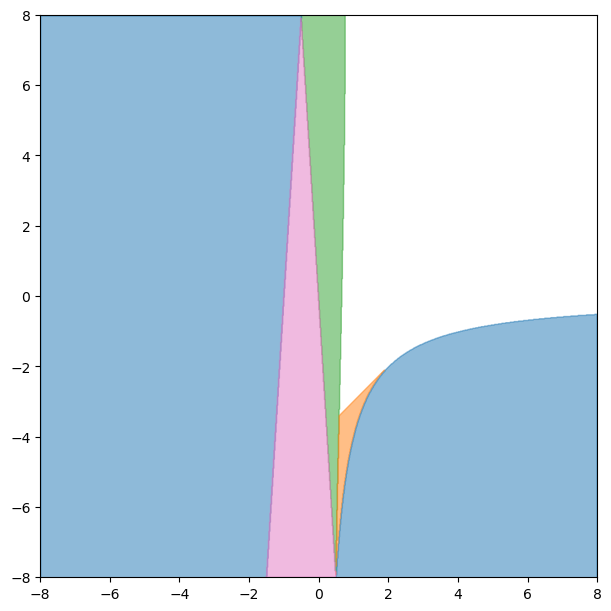

In [4]:
def get_PD_w1_w2_data(sigma_D, sigma_v, Pe, wc, extent=[-8, 8, -8, 8],
                      qmin=1e-5, qmax=1, Nq=200, resolution=1000, overwrite=False):
    fout = "data/PD_w1_w2/sD%g_sv%g_Pe%g_wc%g_qm%g_r%g.npz" % (
            sigma_D, sigma_v, Pe, wc, qmax, resolution
        )
    if not overwrite and os.path.exists(fout):
        with np.load(fout, "rb") as data:
            return data["extent"], data["state"], data["q_range"]
    else:
        nrows, ncols = resolution, resolution
        w1, w2 = np.meshgrid(
            np.linspace(extent[0], extent[1], ncols),
            np.linspace(extent[2], extent[3], nrows)
        )
        mask_LS, mask_LOI, mask_LSI = find_long_instabi(sigma_D, sigma_v, Pe, w1, w2, wc)
        q0_a4, q0_Delta3 = np.zeros((2, nrows, ncols))
        for row in range(nrows):
                for col in range(ncols):
                    if mask_LS[row, col]:
                        q0_a4[row, col], q0_Delta3[row, col] = find_short_instabi(
                            sigma_D, sigma_v, Pe, w1[row, col], w2[row, col], wc)
        state = np.zeros((nrows, ncols), np.byte)
        state[mask_LSI] = 1
        state[mask_LOI] = 2
        state[q0_a4 > 0] = 3
        state[q0_Delta3 > 0] = 4
        q_range = np.array([qmin, qmax, Nq])
        np.savez_compressed(fout, extent=extent, state=state, q_range=q_range)
        return extent, state, q_range


def plot_PD_w1_w2(state, extent, xlim=None, ylim=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(6, 6), sharex=True, sharey=True, constrained_layout=True)
        flag_show = True
    else:
        flag_show = False

    nrows, ncols = state.shape
    # ax.imshow(state, origin="lower", extent=extent)
    contours = find_contours(state)

    for contour in contours["SWO"]:
        x = (contour[:, 1] / ncols) * (extent[1] - extent[0]) + extent[0]
        y = (contour[:, 0] / nrows) * (extent[3] - extent[2]) + extent[2]
        ax.fill(x, y, c="tab:green", alpha=0.5)
    
    for contour in contours["SWS"]:
        x = (contour[:, 1] / ncols) * (extent[1] - extent[0]) + extent[0]
        y = (contour[:, 0] / nrows) * (extent[3] - extent[2]) + extent[2]
        ax.fill(x, y, c="tab:orange", alpha=0.5)

    for contour in contours["LWS"]:
        x = (contour[:, 1] / ncols) * (extent[1] - extent[0]) + extent[0]
        y = (contour[:, 0] / nrows) * (extent[3] - extent[2]) + extent[2]
        # ax.fill(x, y, c="tab:blue", alpha=0.5)
        if (contour[:, 0].max() == nrows-1):
            ax.fill_betweenx(y, extent[0], x, color="tab:blue", alpha=0.5)
        elif (contour[:, 1].max() == ncols - 1):
            ax.fill_between(x, extent[2], y, color="tab:blue", alpha=0.5)

    for contour in contours["LWO"]:
        x = (contour[:, 1] / ncols) * (extent[1] - extent[0]) + extent[0]
        y = (contour[:, 0] / nrows) * (extent[3] - extent[2]) + extent[2]
        ax.fill(x, y, c="tab:pink", alpha=0.5)
    if xlim is None:
        xlim = [extent[0], extent[1]]
    if ylim is None:
        ylim = [extent[2], extent[3]]
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylim(ylim[0], ylim[1])

    if flag_show:
        plt.show()
        plt.close()

sigma_D = 1
sigma_v = 4
Pe = 1
wc = -4
extent, state, q_range = get_PD_w1_w2_data(sigma_D, sigma_v, Pe, wc, qmax=2, Nq=500, resolution=1000)
plot_PD_w1_w2(state, extent)

# extent, state, q_range = get_PD_w1_w2_data(sigma_D, sigma_v, Pe, wc, qmax=2, Nq=500, resolution=4000)
# plot_PD_w1_w2(state, extent)

In [5]:
def get_PD_tilde_w1_w2_data(sigma_D, sigma_v, Pe, wc, extent=[-8, 8, -8, 8],
                            qmin=1e-5, qmax=2.5, Nq=400, resolution=1000, overwrite=False):
    fout = "data/PD_tilde_w1_w2/sD%g_sv%g_Pe%g_wc%g_qm%g_r%g.npz" % (
            sigma_D, sigma_v, Pe, wc, qmax, resolution
        )
    if not overwrite and os.path.exists(fout):
        with np.load(fout, "rb") as data:
            return data["extent"], data["state"], data["q_range"]
    else:
        nrows, ncols = resolution, resolution
        tilde_w1, tilde_w2 = np.meshgrid(
            np.linspace(extent[0], extent[1], ncols),
            np.linspace(extent[2], extent[3], nrows)
        )
        sigma = sigma_D / sigma_v**2
        w1 = np.sqrt( sigma * np.abs(wc)) * tilde_w1
        w2 = np.sqrt(np.abs(wc) / sigma) * tilde_w2 
        mask_LS, mask_LOI, mask_LSI = find_long_instabi(sigma_D, sigma_v, Pe, w1, w2, wc)
        q0_a4, q0_Delta3 = np.zeros((2, nrows, ncols))
        for row in range(nrows):
                for col in range(ncols):
                    if mask_LS[row, col]:
                        q0_a4[row, col], q0_Delta3[row, col] = find_short_instabi(
                            sigma_D, sigma_v, Pe, w1[row, col], w2[row, col], wc)
        state = np.zeros((nrows, ncols), np.byte)
        state[mask_LSI] = 1
        state[mask_LOI] = 2
        state[q0_a4 > 0] = 3
        state[q0_Delta3 > 0] = 4
        q_range = np.array([qmin, qmax, Nq])
        np.savez_compressed(fout, extent=extent, state=state, q_range=q_range)
        return extent, state, q_range


def plot_PD_tilde_w1_w2(state, extent, xlim=None, ylim=None, ax=None, only_SWO=False, legend_loc="upper left", legend_font_size="medium"):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(4, 4), sharex=True, sharey=True, constrained_layout=True)
        flag_show = True
    else:
        flag_show = False

    nrows, ncols = state.shape
    # ax.imshow(state, origin="lower", extent=extent)
    contours = find_contours(state)

    fill_list = []
    if not only_SWO:
        fill1 = None
        for contour in contours["SWS"]:
            x = (contour[:, 1] / ncols) * (extent[1] - extent[0]) + extent[0]
            y = (contour[:, 0] / nrows) * (extent[3] - extent[2]) + extent[2]
            fill1, = ax.fill(x, y, c="tab:orange", alpha=0.5, label="short-wave stationary")
        if fill1 is not None:
            fill_list.append(fill1)

        for contour in contours["LWS"]:
            x = (contour[:, 1] / ncols) * (extent[1] - extent[0]) + extent[0]
            y = (contour[:, 0] / nrows) * (extent[3] - extent[2]) + extent[2]
            # ax.fill(x, y, c="tab:blue", alpha=0.5)
            if (contour[:, 0].max() == nrows-1):
                fill2 = ax.fill_betweenx(y, extent[0], x, color="tab:blue", alpha=0.5, label="long-wave\nstationary")
            elif (contour[:, 1].max() == ncols - 1):
                fill2 = ax.fill_between(x, extent[2], y, color="tab:blue", alpha=0.5, label="long-wave\nstationary")
        fill_list.append(fill2)

        for contour in contours["LWO"]:
            x = (contour[:, 1] / ncols) * (extent[1] - extent[0]) + extent[0]
            y = (contour[:, 0] / nrows) * (extent[3] - extent[2]) + extent[2]

            x_new = np.zeros(x.size + 1)
            y_new = np.zeros(y.size + 1)
            x_new[:x.size] = x
            y_new[:y.size] = y
            x_new[-1] = extent[0]
            y_new[-1] = extent[2]
            fill3, = ax.fill(x_new, y_new, c="tab:pink", alpha=0.5, label="long-wave\noscillatory")
        fill_list.append(fill3)
    x_SWO, y_SWO = None, None
    for contour in contours["SWO"]:
        x = (contour[:, 1] / ncols) * (extent[1] - extent[0]) + extent[0]
        y = (contour[:, 0] / nrows) * (extent[3] - extent[2]) + extent[2]
        fill4, = ax.fill(x, y, c="tab:green", alpha=0.25, label="short-wave\noscillatory")
        if x_SWO is None:
            x_SWO, y_SWO = x, y
        elif x_SWO.size < x.size:
            x_SWO, y_SWO = x, y
    fill_list.append(fill4)
    
    if xlim is None:
        xlim = [extent[0], extent[1]]
    if ylim is None:
        ylim = [extent[2], extent[3]]
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylim(ylim[0], ylim[1])
    # if not only_SWO:
    #     fill_legend = ax.legend(handles=fill_list, loc=legend_loc, fontsize=legend_font_size, borderpad=0.3, labelspacing=0.3)
    #     ax.add_artist(fill_legend)

    if flag_show:
        plt.show()
        plt.close()
    return x_SWO, y_SWO


# Pe = 1
# wc = -1
# extent, state, q_range = get_PD_tilde_w1_w2_data(sigma_D, sigma_v, Pe, wc, qmax=2.5, Nq=500, resolution=1000)
# plot_PD_tilde_w1_w2(state, extent)


# Pe = 0.1
# wc = -1
# extent, state, q_range = get_PD_tilde_w1_w2_data(sigma_D, sigma_v, Pe, wc, qmax=2.5, Nq=500, resolution=1000)
# plot_PD_tilde_w1_w2(state, extent)


# Pe = 100
# wc = -1
# extent, state, q_range = get_PD_tilde_w1_w2_data(sigma_D, sigma_v, Pe, wc, qmax=2.5, Nq=500, resolution=1000)
# plot_PD_tilde_w1_w2(state, extent)

# xlim = [-4, 4]
# ylim = [-4, 4]

# Pe = 10
# wc = -1
# extent, state, q_range = get_PD_tilde_w1_w2_data(sigma_D, sigma_v, Pe, wc, qmax=2.5, Nq=500, resolution=1000)
# x, y = plot_PD_tilde_w1_w2(state, extent, xlim, ylim)



In [6]:
def get_PD_wc_Pe_data(sigma_D, sigma_v, w1, w2, extent=[-10, 0, 0, 11],
                      qmin=1e-5, qmax=1, Nq=200, resolution=1000, overwrite=False, ll=np.sqrt(3./20)):
    fout = "data/PD_wc_Pe/sD%g_sv%g_w1%g_w2%g_qm%g_r%g.npz" % (
            sigma_D, sigma_v, w1, w2, qmax, resolution
        )
    if not overwrite and os.path.exists(fout):
        with np.load(fout, "rb") as data:
            return data["extent"], data["state"], data["q_range"]
    else:
        nrows, ncols = resolution, resolution
        wc, Pe = np.meshgrid(
            np.linspace(extent[0], extent[1], ncols),
            np.linspace(extent[2], extent[3], nrows)
        )
        # wc_1D = np.logspace(-2, 2, ncols)
        # Pe_1D = np.logspace(-2, 2, nrows)
        # wc, Pe = np.meshgrid(
        #     -wc_1D[::-1],
        #     Pe_1D
        # )
        mask_LS, mask_LOI, mask_LSI = find_long_instabi(sigma_D, sigma_v, Pe, w1, w2, wc)
        q0_a4, q0_Delta3 = np.zeros((2, nrows, ncols))
        for row in range(nrows):
                for col in range(ncols):
                    if mask_LS[row, col]:
                        q0_a4[row, col], q0_Delta3[row, col] = find_short_instabi(
                            sigma_D, sigma_v, Pe[row, col], w1, w2, wc[row, col], qmin=qmin, qmax=qmax, ll=ll)
        state = np.zeros((nrows, ncols), np.byte)
        state[mask_LSI] = 1
        state[mask_LOI] = 2
        state[q0_a4 > 0] = 3
        state[q0_Delta3 > 0] = 4
        q_range = np.array([qmin, qmax, Nq])
        np.savez_compressed(fout, extent=extent, state=state, q_range=q_range)
        return extent, state, q_range


def plot_PD_wc_Pe(state, extent, xlim=None, ylim=None, ax=None, alpha=0.25):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(4, 4), sharex=True, sharey=True, constrained_layout=True)
        flag_show = True
    else:
        flag_show = False
    nrows, ncols = state.shape
    contours = find_contours(state)
    for contour in contours["SWO"]:
        print(contour)
        x = (contour[:, 1] / ncols) * (extent[1] - extent[0]) + extent[0]
        y = (contour[:, 0] / nrows) * (extent[3] - extent[2]) + extent[2]
        ax.fill_between(x, y, y.max(), color="tab:green", alpha=alpha)
    # ax.imshow(state, origin="lower", extent=extent)
    # ax.plot(x, y, ".")
    # ax.set_xscale("log")
    # ax.set_yscale("log")
    if xlim is None:
            xlim = [extent[0], extent[1]]
    if ylim is None:
        ylim = [extent[2], extent[3]]
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylim(ylim[0], ylim[1])

    # if flag_show:
    #     plt.show()
    #     plt.close()
    
    # plt.loglog(-x, y)
    # # plt.plot(x, y)
    # plt.show()
    # plt.close()
    

# extent, state, q_range = get_PD_wc_Pe_data(1, 1, 1, 1, overwrite=False)
# plot_PD_wc_Pe(state, extent)

    

In [7]:
def plot_PD_rho_eq_w1_w2(ax=None, label_font_size="large", xmin=-4, xmax=4, ymin=-4, ymax=4, loc_fill_legend=None, loc_line_legend=None, legend_font_size="small", has_inset=True, show_legend=True, sigma_array=None, half_sigma=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(6, 6), constrained_layout=True)
        flag_show = True
    else:
        flag_show = False

    # long-wave stationary
    x1 = ymin + 2
    w1 = np.linspace(x1, xmax, 500)
    w2 = np.zeros_like(w1)
    w2[w1<1] = w1[w1<1] - 2
    w2[w1>=1] = -1 / w1[w1>=1]
    fill1 = ax.fill_between(w1, ymin, w2, color="tab:blue", alpha=0.5, label="long-wave stationary")
    ax.fill_betweenx(w1, xmin, w2, color="tab:blue", alpha=0.5)

    # long-wave oscillatory
    x = np.array([xmin, x1, 1, -1, xmin])
    y = np.array([ymin, ymin, -1, 1, x1])
    fill2,= ax.fill(x, y, color="tab:pink", alpha=0.5, label="long-wave oscillatory")

    fill_list = [fill1, fill2]
    line_list = []
    # sigam = 10
    # sigma_array = np.array([32, 16, 8, 4, 2, 1/2, 1/4, 1/8, 1/16, 1/32])
    if sigma_array is None:
        sigma_array = np.array([128, 32, 8, 2, 1/2, 1/8, 1/32, 1/128])
    cm = plt.cm.get_cmap('tab20')
    for i, sigma in enumerate(sigma_array):
        if i == 0:
            label="short-wave stationary"
        else:
            label = None
        if sigma > 1:
            x1 = -1/np.sqrt(sigma)
            y1 = -1 / x1
            x2 = -2 * np.sqrt(sigma) / (1+sigma)
            y2 = -x2
            line, = ax.plot([x1, x2], [y1, y2], label=r"$%g$" % sigma, color=cm.colors[i+7])

            x = np.linspace(-1, x1, 300)
            y = -1 / x
            xf = np.zeros(x.size + 1)
            yf = np.zeros(y.size + 1)
            xf[:-1] = x
            yf[:-1] = y
            xf[-1] = x2
            yf[-1] = y2
            fill3, = ax.fill(xf, yf, color="tab:orange", alpha=0.25, label=label)
        elif sigma < 1:
            x1 = 1/np.sqrt(sigma)
            y1 = -1 / x1
            x2 = 2 * np.sqrt(sigma) / (1+sigma)
            y2 = -x2
            if half_sigma:
                line, = ax.plot([x1, x2], [y1, y2], "--", label=r"$1/%g$" % (1/sigma), c=cm.colors[i+8])
            else:
                line, = ax.plot([x1, x2], [y1, y2], "--", label=r"$1/%g$" % (1/sigma), c=line_list[sigma_array.size - i - 1].get_c())
            x = np.linspace(x1, 1, 300)
            y = -1 / x
            xf = np.zeros(x.size + 1)
            yf = np.zeros(y.size + 1)
            xf[:-1] = x
            yf[:-1] = y
            xf[-1] = x2
            yf[-1] = y2
            fill3, = ax.fill(xf, yf, color="tab:orange", alpha=0.25, label=label)
        if i == 0:
            fill_list.append(fill3)
        line_list.append(line)
    if loc_fill_legend is None:
        loc_fill_legend = (0.43, 0.35)
    if loc_line_legend is None:
        loc_line_legend = (0.35, 0.55)
    # fill_legend = ax.legend(handles=fill_list, loc=loc_fill_legend, fontsize=legend_font_size, labelspacing=0.2, borderpad=0.3)
    if show_legend:
        # line_legend = ax.legend(handles=line_list, title=r"$\sigma=$", loc=loc_line_legend, fontsize=legend_font_size, borderpad=0.3)
        line_legend = ax.legend(handles=line_list, title=r"$\sigma=$", loc=loc_line_legend, fontsize=legend_font_size, borderpad=0.2)

        # ax.add_artist(fill_legend)
        ax.add_artist(line_legend)


    if flag_show:
        ax.set_xlabel(r"$\tilde{\omega}_1=\omega_1/\sqrt{\sigma|\chi|}$", fontsize=label_font_size)
        ax.set_ylabel(r"$\tilde{\omega}_2=\sqrt{\sigma / |\chi|}\omega_2$", fontsize=label_font_size)

    ax.axhline(0, linestyle="dotted", c="grey")
    ax.axvline(0, linestyle="dotted", c="grey")

    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    # ax.plot(2.4, -0.4, 's')
    # ax.plot(2.4, -0.3, 'o')
    # ax.plot(2.0, -0.4, 's')
    # ax.plot(1.6, -0.4, 's')
    # ax.plot(1., -0.4, 's')
    # ax.plot(0.4, -0.4, 's')

    # ax_in1 = ax.inset_axes([0.67, 0.62, 0.32, 0.32])
    if has_inset:
        ax_in1 = ax.inset_axes([0.665, 0.61, 0.32, 0.32])

        x1 = np.linspace(1e-5, xmax, 1000)
        y1 = 1 / x1
        x2 = np.zeros(x1.size + 1)
        y2 = np.zeros(y1.size + 1)
        x2[1:] = x1
        y2[1:] = y1
        x2[0] = xmin
        y2[0] = ymin 
        ax_in1.fill_between(x2, ymin, y2, color="tab:blue", alpha=0.5)
        ax_in1.text(0.8, 0.08, r"$\tilde{\chi}_A$", transform=ax_in1.transAxes, fontsize="large")
        ax_in1.text(0.05, 0.75, r"$\tilde{\chi}_B$", transform=ax_in1.transAxes, rotation='vertical', fontsize="large")
        ax_in1.set_xlim(xmin, xmax)
        ax_in1.set_ylim(ymin, ymax)
        # ax_in1.set_xticks([-4, -2, 0, 2, 4])
        # ax_in1.set_yticks([-4, -2, 0, 2, 4])
        ax_in1.axhline(0, linestyle="dotted", c="grey")
        ax_in1.axvline(0, linestyle="dotted", c="grey")
        ax_in1.set_title(r"$\chi$ > 0")

    if flag_show:
        plt.show()
        plt.close()


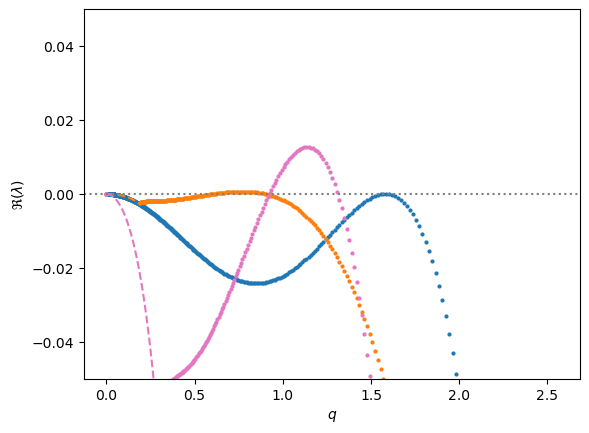

In [9]:
from NRQS_Turing import DMatrix_w_surface_tension
# ax3.set_xlabel(r"$q$", fontsize=label_font_size, labelpad=0.5)
# ax3.set_ylabel(r"$\Re(\lambda)$", fontsize=label_font_size)

# q_arr = np.linspace(1e-6, np.sqrt(20/3), 1000)
q_arr = np.logspace(-4, np.log10(np.sqrt(20/3)), 1000, endpoint=False)

eta_AA = -0.58
eta_BB = -2.58
eta_AB = 1
eta_BA = -1
M1 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=4, bar_vB=1)

# eta_AA = -0.78
# eta_BB = -2.81
# eta_AB = 1
# eta_BA = -1
# M2 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=4, bar_vB=1)

# eta_AA = -0.945
# eta_BB = -1.4525
# eta_AB = 0.25
# eta_BA = -0.25
# M3 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=4, bar_vB=1)

eta_AA = -0.989
eta_BB = -1.2036
eta_AB = 0.1
eta_BA = -0.1
M2 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=8, bar_vB=1)

eta_AA = -0.9725
eta_BB = -1.5091
eta_AB = 0.25
eta_BA = -0.25
M3 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=8, bar_vB=1)

c_list = ["tab:blue", "tab:orange", "tab:pink", "tab:green"]
M_list = [M1, M2, M3]
scale_factor = np.array([1, 1, 4, 1]) * 1
for i, M in enumerate(M_list):
    lamb = M.get_lambda_q(q_arr).max(axis=1)
    mask_r = np.abs(lamb.imag) <= 1e-8
    mask_i = mask_r == False

    line, = plt.plot(q_arr[mask_r], lamb[mask_r].real * scale_factor[i], "o", c=c_list[i], ms=2)
    plt.plot(q_arr[mask_i], lamb[mask_i].real * scale_factor[i], c=line.get_c(), linestyle="dashed")
    # line, = plt.plot(q_arr, np.abs(lamb.imag) * Dr[i], c=c_list[i])

plt.ylim(-0.05, 0.05)
plt.axhline(0, c="tab:grey", linestyle="dotted")
plt.xlabel(r"$q$")
plt.ylabel(r"$\Re(\lambda)$")
plt.show()
plt.close()

0.30000000000000004
0.5
0.7000000000000002


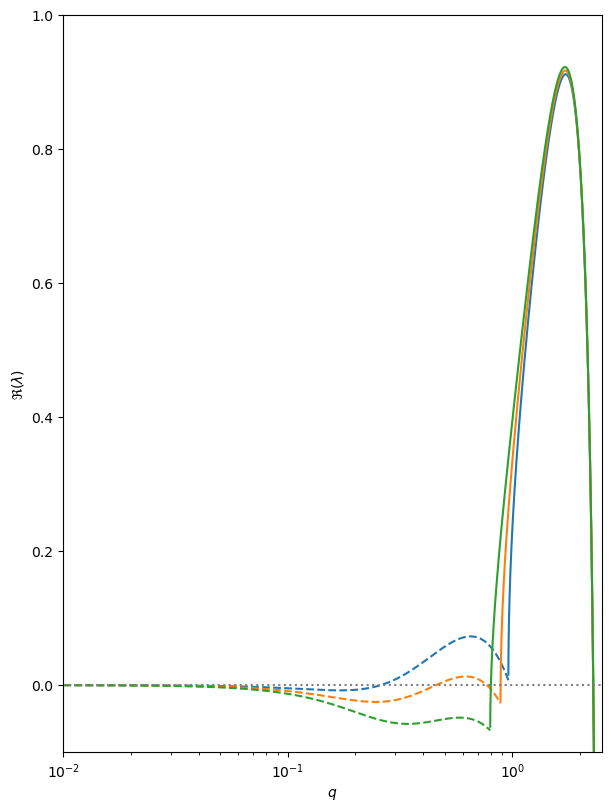

In [10]:
from NRQS_Turing import DMatrix_w_surface_tension
# ax3.set_xlabel(r"$q$", fontsize=label_font_size, labelpad=0.5)
# ax3.set_ylabel(r"$\Re(\lambda)$", fontsize=label_font_size)

# q_arr = np.linspace(1e-6, np.sqrt(20/3), 1000)
q_arr = np.logspace(-2, np.log10(np.sqrt(20/3)), 100000, endpoint=False)

# eta_AA = -0.58
# eta_BB = -2.58
# eta_AB = 1
# eta_BA = -1
# M1 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=4, bar_vB=1)

# eta_AA = -0.78
# eta_BB = -2.81
# eta_AB = 1
# eta_BA = -1
# M2 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=4, bar_vB=1)

# eta_AA = -0.945
# eta_BB = -1.4525
# eta_AB = 0.25
# eta_BA = -0.25
# M3 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=4, bar_vB=1)

# eta_AA = -0.989
# eta_BB = -1.2036
# eta_AB = 0.1
# eta_BA = -0.1
# M2 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=8, bar_vB=1)

# eta_AA = -0.9725
# eta_BB = -1.5091
# eta_AB = 0.25
# eta_BA = -0.25
# M3 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=8, bar_vB=1)


def plot_lambda(x, y, ax, threshold=1e-8):
    mask_r = np.abs(y.imag) <= threshold
    turning_pts = [0]
    states = [mask_r[0]]
    for i in range(x.size):
        if states[-1] != mask_r[i]:
            turning_pts.append(i)
            states.append(mask_r[i])
    turning_pts.append(x.size)
    line = None
    for i, s in enumerate(states):
        beg, end = turning_pts[i], turning_pts[i+1]
        xx = x[beg:end]
        yy = y[beg:end].real
        if s:
            ls = "-"
        else:
            ls = "--"
        if line is None:
            line, = ax.plot(xx, yy, ls)
        else:
            ax.plot(xx, yy, ls, c=line.get_c())


chi_A = 0.8
chi_B = -0.5
fig, ax = plt.subplots(figsize=(6, 8), constrained_layout=True)
dx = 0.2
eta_AB = 1
eta_BA = -1
wc = eta_AB * eta_BA
sigma = 1/64
for i in range(3):
    chi_A_new = chi_A + dx * i
    chi_B_new = chi_B
    print(chi_A_new + chi_B_new)
    eta_AA, eta_BB = get_wAA_wBB(chi_A_new, chi_B_new, wc, sigma)
    
    M = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=1, Dr_B=1, bar_vA=8, bar_vB=1)
    lamb = M.get_lambda_q(q_arr).max(axis=1)
    # mask_q = np.logical_and(q_arr < 2, q_arr>1.4e-2)
    # q_arr = q_arr[mask_q]
    # lamb = lamb[mask_q]
    # mask_r = np.abs(lamb.imag) <= 1e-8
    # mask_i = mask_r == False

    # line, = plt.plot(q_arr[mask_r], lamb[mask_r].real)
    # plt.plot(q_arr[mask_i], lamb[mask_i].real , "--", c=line.get_c())
    # line, = plt.plot(q_arr, np.abs(lamb.imag) * Dr[i], c=c_list[i])
    plot_lambda(q_arr, lamb, ax)

ax.set_ylim(-0.1, 1)
ax.set_xlim(1e-2, 2.5)
ax.set_xscale("log")
ax.axhline(0, c="tab:grey", linestyle="dotted")
ax.set_xlabel(r"$q$")
ax.set_ylabel(r"$\Re(\lambda)$")
plt.show()
plt.close()

1.0645139037372864
0.9645139037372863
0.8645139037372863
0.7645139037372862
0.6645139037372865
0.5645139037372864
0.4645139037372863
0.3645139037372863
0.26451390373728634
0.16451390373728647


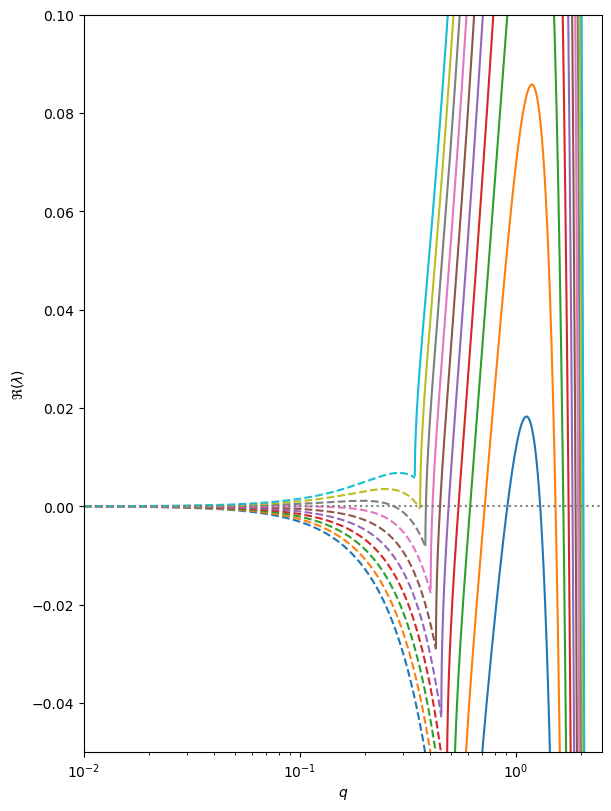

In [11]:
from NRQS_Turing import DMatrix_w_surface_tension
# ax3.set_xlabel(r"$q$", fontsize=label_font_size, labelpad=0.5)
# ax3.set_ylabel(r"$\Re(\lambda)$", fontsize=label_font_size)

# q_arr = np.linspace(1e-6, np.sqrt(20/3), 1000)
q_arr = np.logspace(-2, np.log10(np.sqrt(20/3)), 100000, endpoint=False)

# eta_AA = -0.58
# eta_BB = -2.58
# eta_AB = 1
# eta_BA = -1
# M1 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=4, bar_vB=1)

# eta_AA = -0.78
# eta_BB = -2.81
# eta_AB = 1
# eta_BA = -1
# M2 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=4, bar_vB=1)

# eta_AA = -0.945
# eta_BB = -1.4525
# eta_AB = 0.25
# eta_BA = -0.25
# M3 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=4, bar_vB=1)

# eta_AA = -0.989
# eta_BB = -1.2036
# eta_AB = 0.1
# eta_BA = -0.1
# M2 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=8, bar_vB=1)

# eta_AA = -0.9725
# eta_BB = -1.5091
# eta_AB = 0.25
# eta_BA = -0.25
# M3 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=8, bar_vB=1)


def plot_lambda(x, y, ax, threshold=1e-8):
    mask_r = np.abs(y.imag) <= threshold
    turning_pts = [0]
    states = [mask_r[0]]
    for i in range(x.size):
        if states[-1] != mask_r[i]:
            turning_pts.append(i)
            states.append(mask_r[i])
    turning_pts.append(x.size)
    line = None
    for i, s in enumerate(states):
        beg, end = turning_pts[i], turning_pts[i+1]
        xx = x[beg:end]
        yy = y[beg:end].real
        if s:
            ls = "-"
        else:
            ls = "--"
        if line is None:
            line, = ax.plot(xx, yy, ls)
        else:
            ax.plot(xx, yy, ls, c=line.get_c())


eta_AA = -0.9725
eta_BB = -1.5091
eta_AB = 0.25
eta_BA = -0.25
wc = eta_AB * eta_BA
sigma = 1/128

chi_A, chi_B = get_tilde_w1_w2(eta_AA, eta_BB, wc, sigma)
fig, ax = plt.subplots(figsize=(6, 8), constrained_layout=True)
dx = 0.05

for i in range(10):
    chi_A_new = chi_A - dx * i
    chi_B_new = chi_B - dx * i
    print(chi_A_new + chi_B_new)
    eta_AA, eta_BB = get_wAA_wBB(chi_A_new, chi_B_new, wc, sigma)
    
    M = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=1, Dr_B=1, bar_vA=8, bar_vB=1)
    lamb = M.get_lambda_q(q_arr).max(axis=1)
    # mask_q = np.logical_and(q_arr < 2, q_arr>1.4e-2)
    # q_arr = q_arr[mask_q]
    # lamb = lamb[mask_q]
    # mask_r = np.abs(lamb.imag) <= 1e-8
    # mask_i = mask_r == False

    # line, = plt.plot(q_arr[mask_r], lamb[mask_r].real)
    # plt.plot(q_arr[mask_i], lamb[mask_i].real , "--", c=line.get_c())
    # line, = plt.plot(q_arr, np.abs(lamb.imag) * Dr[i], c=c_list[i])
    plot_lambda(q_arr, lamb, ax)

ax.set_ylim(-0.05, 0.1)
ax.set_xlim(1e-2, 2.5)
ax.set_xscale("log")
ax.axhline(0, c="tab:grey", linestyle="dotted")
ax.set_xlabel(r"$q$")
ax.set_ylabel(r"$\Re(\lambda)$")
plt.show()
plt.close()